# Import library

In [1]:
import pandas as pd
# import jtplot submodule from jupyterthemes
from jupyterthemes import jtplot

# currently installed theme will be used to
# set plot style if no arguments provided
jtplot.style()

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#import janitor as jn
from sklearn import (
    ensemble,
    model_selection,
    preprocessing,
    tree
)
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    accuracy_score,
    precision_score,
    average_precision_score,
    recall_score,
    f1_score,
    precision_recall_curve,
    cohen_kappa_score,
    confusion_matrix,
    plot_confusion_matrix,
    classification_report
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
    cross_val_score,
    cross_val_predict
)
from yellowbrick.classifier import (
    ConfusionMatrix,
    ROCAUC
)
from yellowbrick.model_selection import (
    LearningCurve 
)
#from imblearn.over_sampling import (
    #SMOTE, ADASYN
#)
from seaborn import diverging_palette

In [3]:
import configparser
sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

font = {'family' : 'Optima',
        'weight' : 'regular',
        'size'   : 16}
plt.rc('font', **font)
plt.rc('xtick', labelsize=15)     # tick labels bigger
plt.rc('ytick', labelsize=15)     # tick labels bigger
plt.rc('savefig', dpi=300)       # higher res outputs

# Evaluation Metrics

In [17]:
def clf_score(clf, X_train, y_train, X_val, y_val, train=True):
    if train:
        print("Train Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))

        res = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))

    elif train == False:
        print("Validation Result:\n")
        print("accuracy score: {0:.4f}\n".format(accuracy_score(y_val, clf.predict(X_val))))
        
        precision, recall, _ = precision_recall_curve(y_val, clf.predict(X_val))
        average_precision = average_precision_score(y_val, clf.predict(X_val))
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_val, clf.predict(X_val))
        roc_auc = roc_auc_score(y_val, clf.predict(X_val))
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_val, clf.predict(X_val))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_val, clf.predict(X_val))))
        plot_confusion_matrix(clf,  X_val, clf.predict(X_val))
        print("End of validation Result\n")

In [5]:
def evaluation_metrics(y_actual, y_pred):
            
        precision, recall, _ = precision_recall_curve(y_actual, y_pred)
        average_precision = average_precision_score(y_actual, y_pred)
        plot_pr_curve(precision, recall, average_precision)
        
        fpr, tpr, _ = roc_curve(y_actual, y_pred)
        roc_auc = roc_auc_score(y_actual, y_pred)
        print("roc auc score: {}\n".format(roc_auc))
        plot_roc_curve(fpr, tpr, roc_auc)
        
        print("Classification Report: \n {}\n".format(classification_report(y_actual, y_pred)))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_actual, y_pred)))

In [6]:
def plot_roc_curve(fpr, tpr, roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [7]:
def plot_pr_curve(precision, recall, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')   
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()

# Import Balanced Data

In [48]:
fraud_train = pd.read_csv('Fraud_sampledtrain.csv')
X_train = fraud_train.drop(columns = ['Unnamed: 0','FraudFound_P'])
y_train = fraud_train['FraudFound_P']
fraud_val = pd.read_csv('Fraud_val.csv')
X_val = fraud_val.drop(columns = ['Unnamed: 0','FraudFound_P'])
y_val = fraud_val['FraudFound_P']
fraud_test = pd.read_csv('Fraud_test.csv')
X_test = fraud_test.drop(columns = ['Unnamed: 0','FraudFound_P'])
y_test = fraud_test['FraudFound_P']

# Modeling
## DummyClassifier

In [9]:
from sklearn.dummy import DummyClassifier

clf_dummy = DummyClassifier()
clf_dummy.fit(X_train, y_train)

DummyClassifier()

Validation Result:

accuracy score: 0.0598



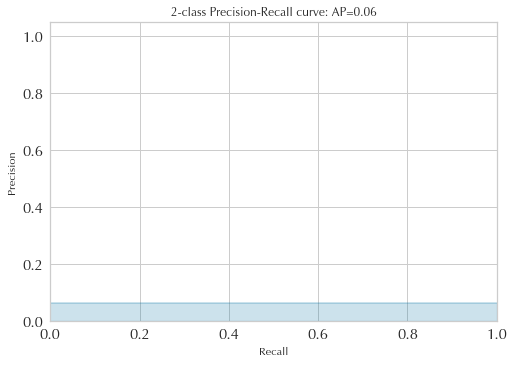

roc auc score: 0.5



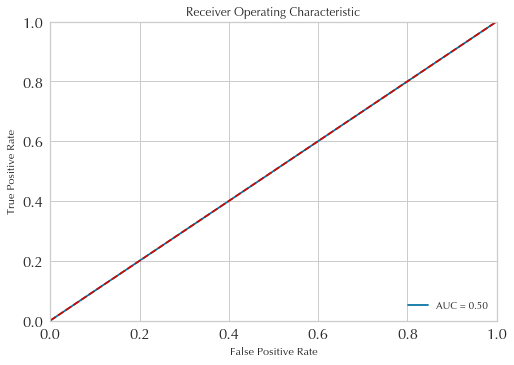

/Users/juliana/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juliana/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juliana/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      2090
           1       0.06      1.00      0.11       133

    accuracy                           0.06      2223
   macro avg       0.03      0.50      0.06      2223
weighted avg       0.00      0.06      0.01      2223


Confusion Matrix: 
 [[   0 2090]
 [   0  133]]

End of validation Result



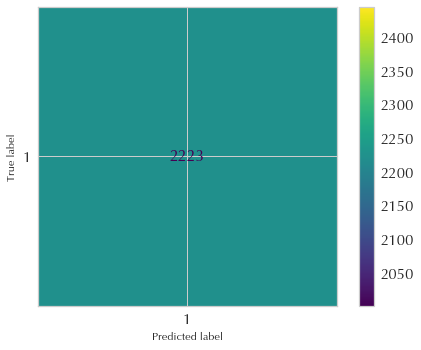

In [18]:
clf_score(clf_dummy, X_train, y_train, X_val, y_val, train=False)

## Random Forest

Validation Result:

accuracy score: 0.8741



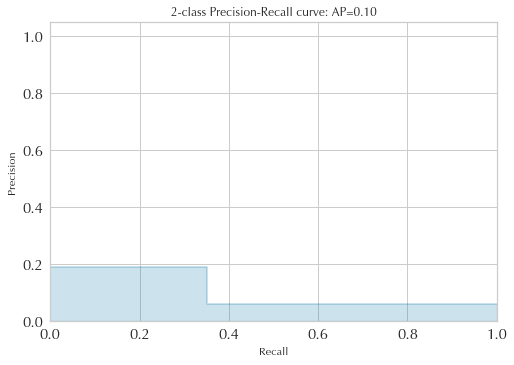

roc auc score: 0.6288679197477912



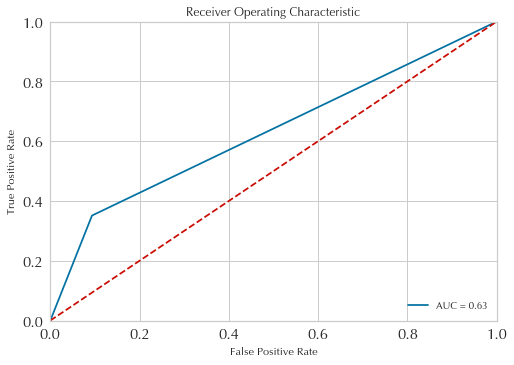

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.91      0.93      2109
           1       0.19      0.35      0.25       131

    accuracy                           0.87      2240
   macro avg       0.57      0.63      0.59      2240
weighted avg       0.91      0.87      0.89      2240


Confusion Matrix: 
 [[1912  197]
 [  85   46]]

End of validation Result



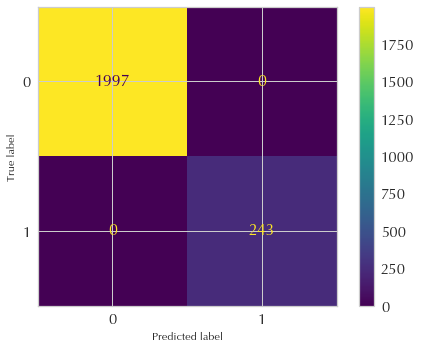

In [13]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=40, random_state=0)
clf_rf.fit(X_train, y_train)
clf_score(clf_rf, X_train, y_train, X_test, y_test, train=False)

### Hyperparameter Tuning with Grid Search

In [64]:
clf_rf_grid = ensemble.RandomForestClassifier()
params = {
    "max_features": [0.4, 'auto','log2'],
    "n_estimators": [100,200,300],
    "min_samples_leaf": [1, 2, 5, 10],
    "min_samples_split":[2,10,25,50],
    "random_state": [0],
    "max_depth":[5,10,15,25]
}

cv = model_selection.GridSearchCV(clf_rf_grid, params,
                                  n_jobs=-1).fit(X_train, y_train)
print(cv.best_params_)

{'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 0}


In [ ]:
clf_rf_best = ensemble.RandomForestClassifier(
    **{
        "max_features": 'log2',
        "n_estimators": 300,
        "min_samples_leaf": 1,
        "min_samples_split":2,
        "random_state": 0,
        "max_depth":25
    })
clf_rf_best.fit(X_train, y_train)
clf_rf_best.score(X_test, y_test)

Validation Result:

accuracy score: 0.8670



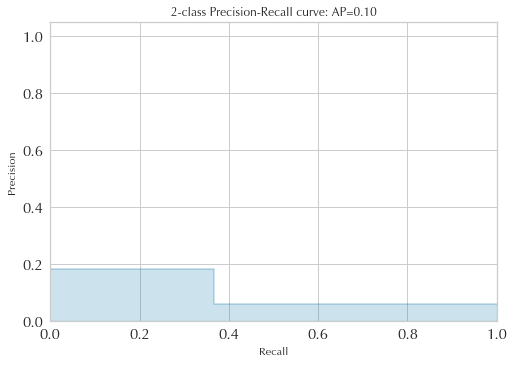

roc auc score: 0.6322340822139938



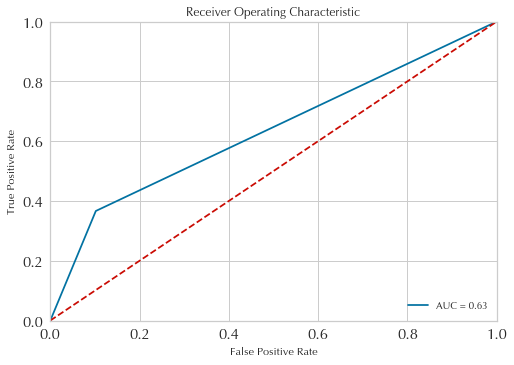

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      2109
           1       0.18      0.37      0.24       131

    accuracy                           0.87      2240
   macro avg       0.57      0.63      0.59      2240
weighted avg       0.91      0.87      0.89      2240


Confusion Matrix: 
 [[1894  215]
 [  83   48]]

End of validation Result



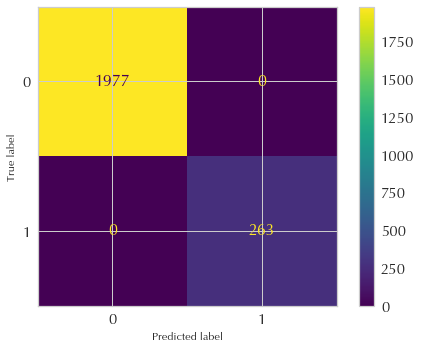

In [21]:
clf_score(clf_rf_best, X_train, y_train, X_test, y_test, train=False)

### Evaluation on test set
#### Class prediction error

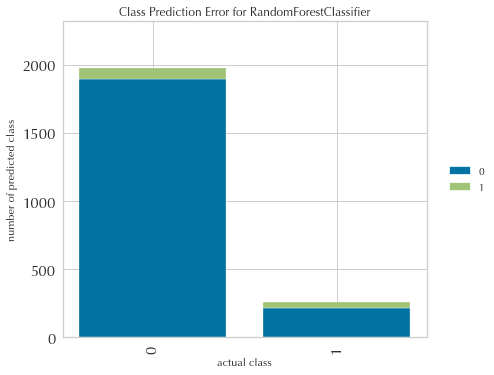

<AxesSubplot:title={'center':'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [31]:
from yellowbrick.classifier import ClassPredictionError

classes = ["0", "1"]

visualizer = ClassPredictionError(
    clf_rf_best, classes=classes, is_fitted=True
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

#### Classification Report

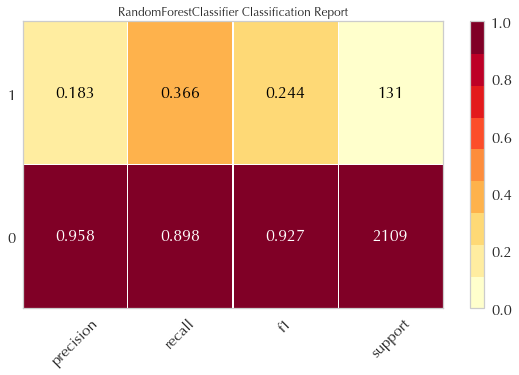

<AxesSubplot:title={'center':'RandomForestClassifier Classification Report'}>

In [32]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(
    clf_rf_best, classes=classes, support=True, is_fitted=True
)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

#### Results

Precision, recall, f1-score
* Presicion: If the model identifies a people as fraud, the prob that is right is 18%
* Recall: Among fraud people, the prob that model identify them as fraud is 37%
* F1 score: 24%
* Conclusion: pretty bad model in terms of recall for fraud detection

#### Confusion Matrix

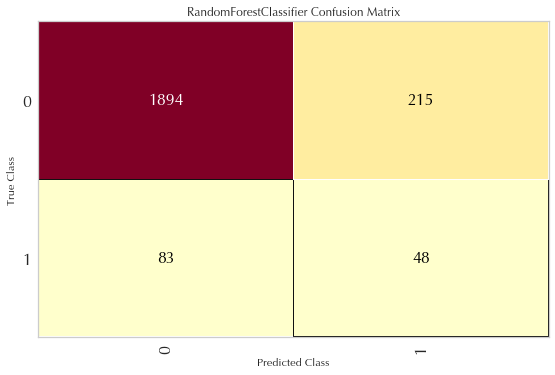

<AxesSubplot:title={'center':'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [33]:
from yellowbrick.classifier import confusion_matrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(clf_rf_best, classes=[0,1], is_fitted=True)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()

#### Results: our test dataset contains 2240 observations, among the 131 number of fraud cases presented here, the model successfully identify 48, which is a 36% of accuracy here, not really good

#### PR Curve

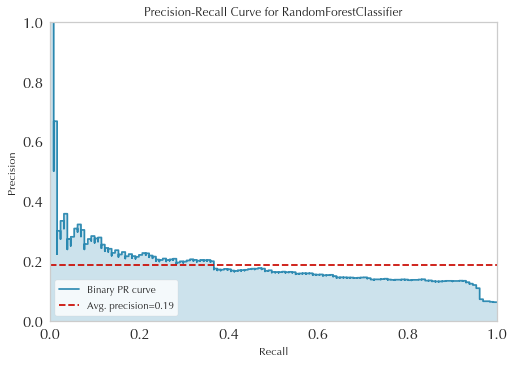

<AxesSubplot:title={'center':'Precision-Recall Curve for RandomForestClassifier'}, xlabel='Recall', ylabel='Precision'>

In [34]:
from yellowbrick.classifier import PrecisionRecallCurve
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(clf_rf_best, is_fitted=True)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

#### ROC-AUC Curve

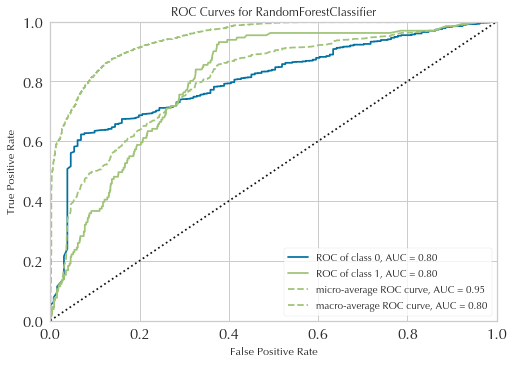

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [35]:
visualizer = ROCAUC(
    clf_rf_best, classes=classes, is_fitted=True
)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

#### Results: we see a AUC of 0.8, which means that there is a 80% chance that our model will be able to distinguish between non-fraud class and fraudulent class, which is a pretty good percentage here

#### Validation Curve

In [29]:
clf_rf_best = ensemble.RandomForestClassifier(
    **{
        "max_features": 'log2',
        "n_estimators": 300,
        "min_samples_leaf": 1,
        "min_samples_split":2,
        "random_state": 0,
        "max_depth":25
    })
clf_rf_best.fit(X_train, y_train)
clf_rf_best.score(X_test, y_test)

0.8669642857142857

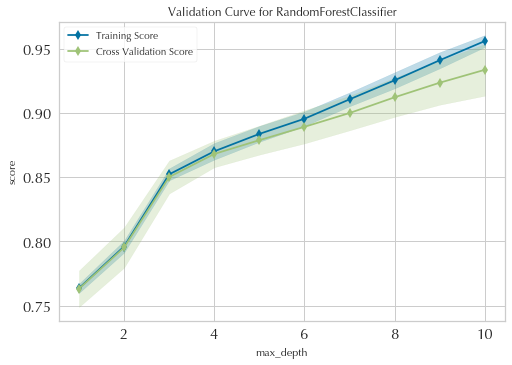

<AxesSubplot:title={'center':'Validation Curve for RandomForestClassifier'}, xlabel='max_depth', ylabel='score'>

In [30]:
from yellowbrick.model_selection import ValidationCurve

viz = ValidationCurve(
    RandomForestClassifier(n_estimators=300, random_state=0), 
    param_name="max_depth",
    param_range=np.arange(1, 11), 
    cv=5, 
    scoring="f1_weighted",
    np_jobs=8
)

# Fit and show the visualizer
viz.fit(X_train, y_train)
viz.poof()

#### Discrimination Threshold

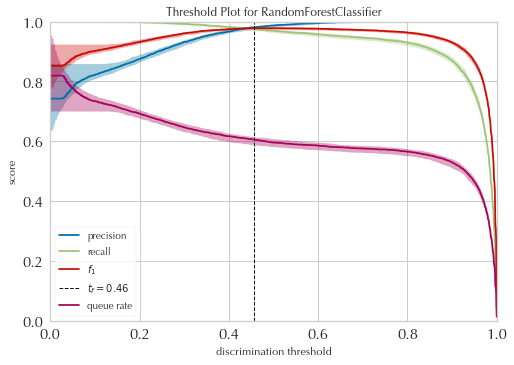

<AxesSubplot:title={'center':'Threshold Plot for RandomForestClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [36]:
from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(clf_rf_best, is_fitted=True)

visualizer.fit(X_train, y_train)
visualizer.poof() 

#### Decision Function

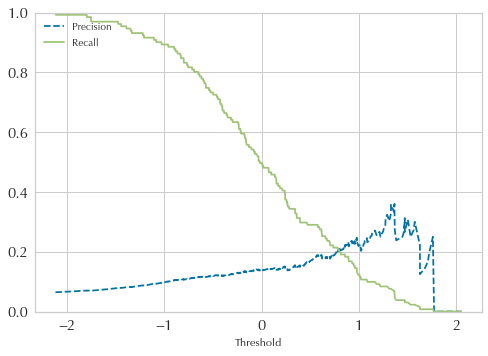

In [38]:
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve

clf_svc = SVC(gamma='auto')
clf_svc.fit(X_train, y_train)

# call decision_function on classifier to get scores (probas_pred)
probas_pred = clf_svc.decision_function(X_test)
# compute precision-recall pairs for different probability thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, probas_pred)
# precision and recall vs. the decision threshold
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.ylim([0, 1])
plt.show()

#### Feature Importance

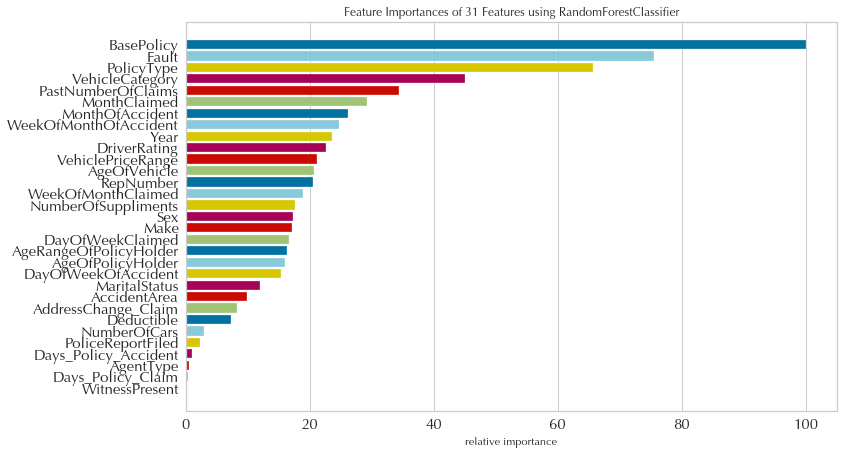

<AxesSubplot:title={'center':'Feature Importances of 31 Features using RandomForestClassifier'}, xlabel='relative importance'>

In [37]:
from yellowbrick.model_selection import FeatureImportances

fig = plt.figure(figsize=(12, 6.6))
viz = FeatureImportances(clf_rf_best, labels=X_train.columns)
viz.fit(X_train, y_train)
viz.poof()

## Adaboost

In [49]:
from sklearn.ensemble import AdaBoostClassifier
clf_ada_boost = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_ada_boost.fit(X_train, y_train)


AdaBoostClassifier(n_estimators=100, random_state=0)

In [ ]:
print("accuracy score: {0:.4f}\n".format(accuracy_score(y_train, clf_ada_boost.predict(X_train))))
print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf_ada_boost.predict(X_train))))

#### Hyperparameter tuning for adaboost

In [63]:
params = {
    "n_estimators": [100,200,300],
    "learning_rate": [0.001, 0.01, 0.1, 0.2,0.5,1],
}

cv = model_selection.GridSearchCV(AdaBoostClassifier(random_state=0), 
                                  param_grid=params).fit(X_train, y_train)
print(cv.best_params_)

{'learning_rate': 1, 'n_estimators': 300}


In [46]:
clf_ada_boost_best = AdaBoostClassifier(n_estimators=300,learning_rate=1,random_state=0)
clf_ada_boost_best.fit(X_train, y_train)
clf_ada_boost_best.score(X_test, y_test)

0.5839285714285715

### Evaluation on test set
#### Class prediction error

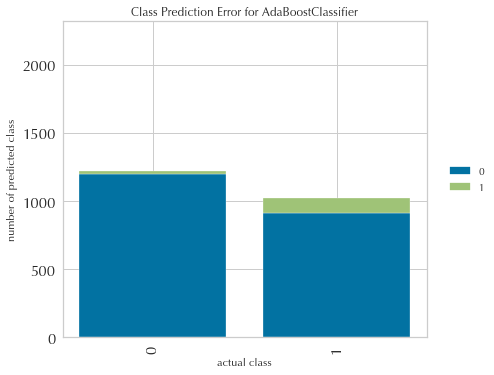

<AxesSubplot:title={'center':'Class Prediction Error for AdaBoostClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [52]:
from yellowbrick.classifier import ClassPredictionError

classes = ["0", "1"]

visualizer = ClassPredictionError(
    clf_ada_boost_best, classes=classes, is_fitted=True
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

#### Classification Report

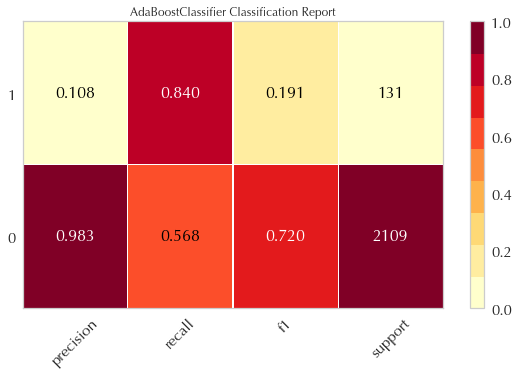

<AxesSubplot:title={'center':'AdaBoostClassifier Classification Report'}>

In [53]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(
    clf_ada_boost_best, classes=classes, support=True, is_fitted=True
)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

#### Results

Precision, Recall, F1-score
* Presicion: If the model identifies a people as fraud, the prob that is right is 84%
* Recall: Among fraud people, the prob that model identify them as fraud is 11%
* F1-score: decrease to 19%
* Conclusion: better model in terms of recall for fraud detection compared with random forest

#### Confusion_matrix

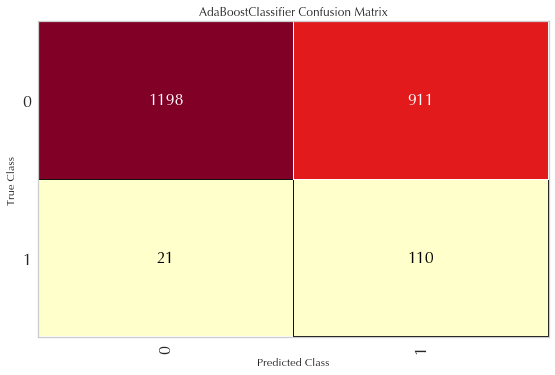

<AxesSubplot:title={'center':'AdaBoostClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [54]:
from yellowbrick.classifier import confusion_matrix

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(clf_ada_boost_best, classes=[0,1], is_fitted=True)

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()

#### Results: our test dataset contains 2240 observations, among the 131 number of fraud cases presented here, the model successfully identify 110, which is a 83% of accuracy here. 

#### PR Curve

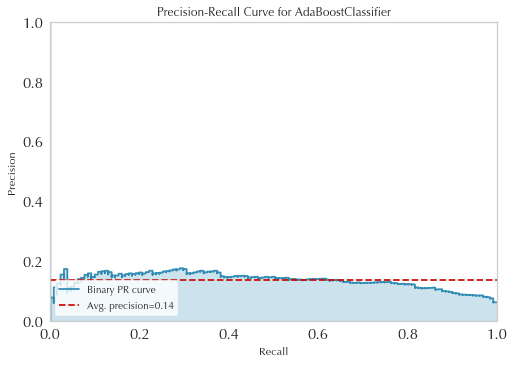

<AxesSubplot:title={'center':'Precision-Recall Curve for AdaBoostClassifier'}, xlabel='Recall', ylabel='Precision'>

In [55]:
from yellowbrick.classifier import PrecisionRecallCurve
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(clf_ada_boost_best, is_fitted=True)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

#### ROC-AUC Curve

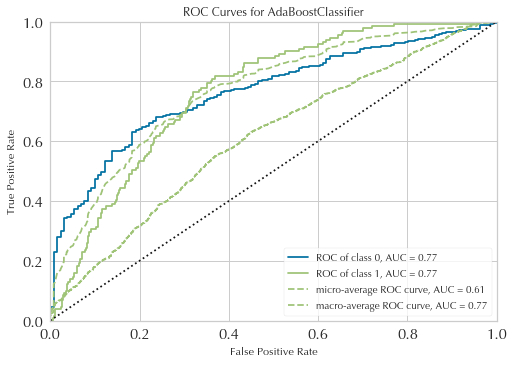

<AxesSubplot:title={'center':'ROC Curves for AdaBoostClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [56]:
visualizer = ROCAUC(
    clf_ada_boost_best, classes=classes, is_fitted=True
)

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

#### Results: we see a AUC of 0.77, which means that there is a 77% chance that our model will be able to distinguish between non-fraud class and fraudulent class.  

#### Validation Curve

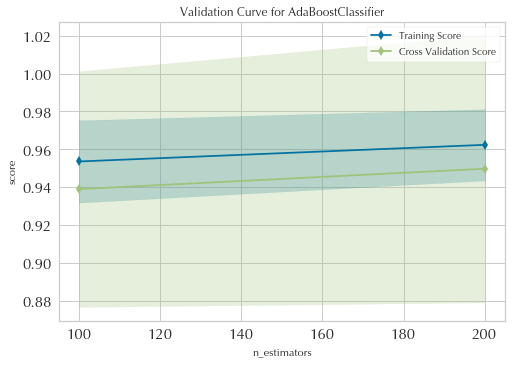

<AxesSubplot:title={'center':'Validation Curve for AdaBoostClassifier'}, xlabel='n_estimators', ylabel='score'>

In [60]:
from yellowbrick.model_selection import ValidationCurve

viz = ValidationCurve(
    AdaBoostClassifier(n_estimators=100, random_state=0), 
    param_name="n_estimators",
    param_range=np.arange(100, 300,100), 
    cv=5, 
    scoring="f1_weighted",
    np_jobs=8
)

# Fit and show the visualizer
viz.fit(X_train, y_train)
viz.poof()

#### Discrimination Threshold

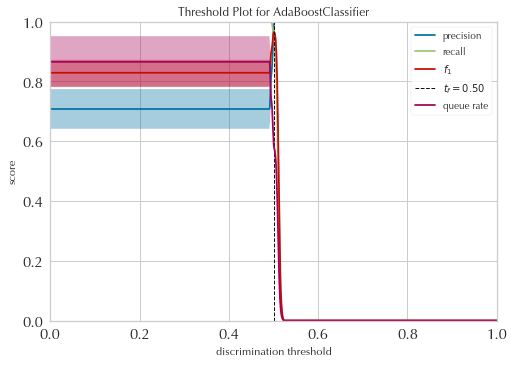

<AxesSubplot:title={'center':'Threshold Plot for AdaBoostClassifier'}, xlabel='discrimination threshold', ylabel='score'>

In [58]:
from yellowbrick.classifier import DiscriminationThreshold

visualizer = DiscriminationThreshold(clf_ada_boost_best, is_fitted=True)

visualizer.fit(X_train, y_train)
visualizer.poof() 

#### Decision Function

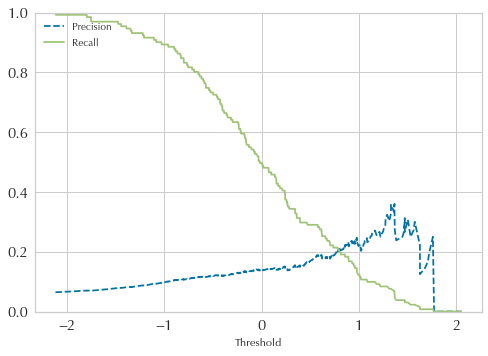

In [62]:
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve

clf_svc = SVC(gamma='auto')
clf_svc.fit(X_train, y_train)

# call decision_function on classifier to get scores (probas_pred)
probas_pred = clf_svc.decision_function(X_test)
# compute precision-recall pairs for different probability thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, probas_pred)
# precision and recall vs. the decision threshold
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend(loc="upper left")
plt.ylim([0, 1])
plt.show()

#### Feature importance

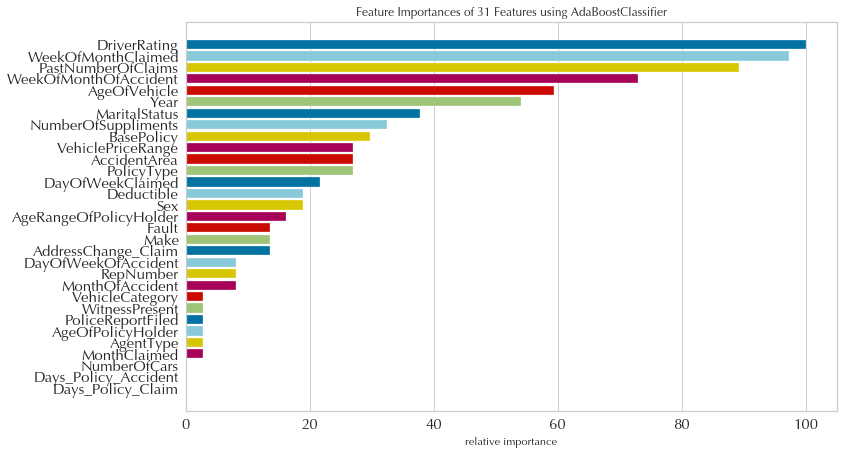

<AxesSubplot:title={'center':'Feature Importances of 31 Features using AdaBoostClassifier'}, xlabel='relative importance'>

In [61]:
from yellowbrick.model_selection import FeatureImportances

fig = plt.figure(figsize=(12, 6.6))
viz = FeatureImportances(clf_ada_boost_best, labels=X_train.columns)
viz.fit(X_train, y_train)
viz.poof()